In [2]:
from models.XGB.xgb_model import XGBModel

import os
import pandas as pd

ROOT_PATH = os.path.pardir
SUNSPOTS_PATH = os.path.join(ROOT_PATH, "datasets/Sunspots.csv")
MACKEY_GLASS_PATH = os.path.join(ROOT_PATH, "datasets/MackeyGlass.csv")
ELECTRICITY_PATH = os.path.join(ROOT_PATH, "datasets/Electricity.csv")

# XGB Model
## 100/30 Model definition
We define a model that will predict 30 steps ahead based on 100 steps behind.

In [4]:
MyXGB_100_30 = XGBModel(
    dataset=pd.read_csv(MACKEY_GLASS_PATH),
    n_steps_in=100,
    n_steps_out=30,
    test_frac=0.1,
    metric=None,
    target_column='Total'
)

Target column: 'Total'


## Fit model to data

In [5]:
MyXGB_100_30.fit()

## Get forecasts
### with autoregression as well!

In [6]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyXGB_100_30.predict(-1, autoreggressive=True)

# Windowed forecast with shift, 25 ahead
forecast = MyXGB_100_30.predict(10, autoreggressive=False, shift=0)

## Plot forecasts

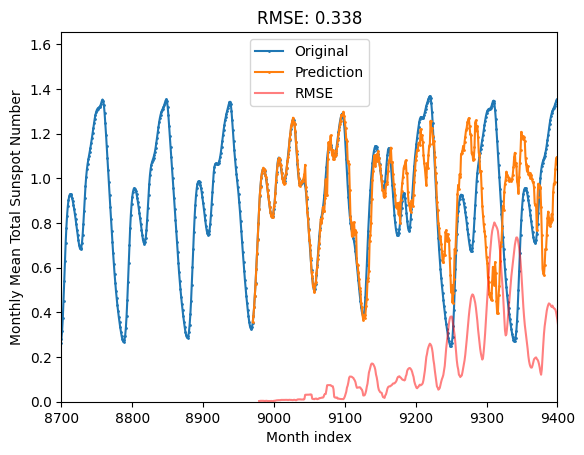

In [10]:
# Autoregressive forecast
MyXGB_100_30.plotter.plot_forecast(forecast_autoregressive, linestyle='-', xlim=(8700, 9400))

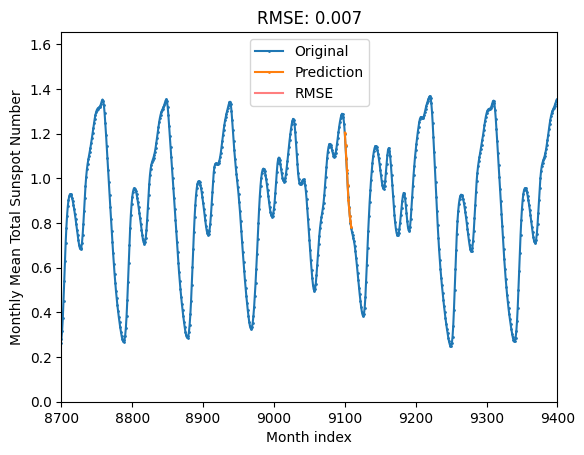

In [11]:
# Windowed forecast
MyXGB_100_30.plotter.plot_forecast(forecast, linestyle='-', xlim=(8700, 9400))

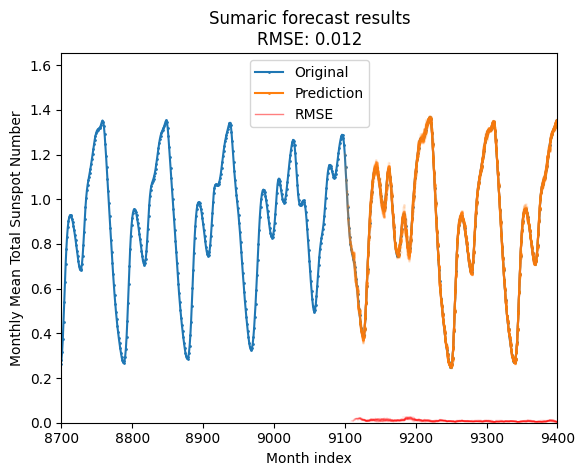

In [12]:
# Cumulative plot for windowed forecast
MyXGB_100_30.plotter.plot_forecasts(MyXGB_100_30.forecasts, linestyle='-', xlim=(8700, 9400))

## 50/1 Model definition
We define a model that will predict a single steps ahead based on 50 steps behind.

In [13]:
MyXGB_50_1 = XGBModel(
    dataset=pd.read_csv(MACKEY_GLASS_PATH, index_col=0),
    n_steps_in=50,
    n_steps_out=1,
    test_frac=0.1,
    metric=None,
)

Target column: 'Total'


In [15]:
# Fit to data
MyXGB_50_1.fit()

In [16]:
# Autoregressive forecast, as far as test dataset
forecast_autoregressive = MyXGB_50_1.predict(-1, autoreggressive=True)

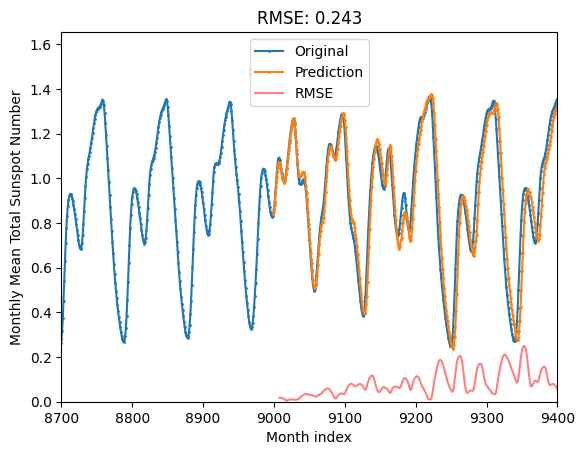

In [17]:
# Autoregressive forecast
MyXGB_50_1.plotter.plot_forecast(forecast_autoregressive, linestyle='-', xlim=(8700, 9400))